Implement the XOR function. XOR is a two-input binary function that outputs 1 when the inputs are different, and 0 otherwise.



In [4]:
import numpy as np
x=np.array([[1,2],[3,4]])
y=np.array([[1,1],[1,1]])
z=x*y
print(x)
print(z)

[[1 2]
 [3 4]]
[[1 2]
 [3 4]]


In [5]:
import numpy as np

def XOR(x):
  result=[]
  for [i,j] in x:
    if i!=j:
      result.append([1.])
    else:
      result.append([0.])
  result=np.transpose(result)
  result=result.reshape(np.size(result),1)
  return result

X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y=XOR(X)
print(X)
print(Y)


[[0 0]
 [0 1]
 [1 0]
 [1 1]]
[[0.]
 [1.]
 [1.]
 [0.]]


Replicate the data (use **numpy.tile()** function) and add some noise to ease the convergence 

In [6]:
#create training set
X_replicate=np.tile(X,(250,1))                   
noise = np.random.randn(X_replicate.shape[0],X_replicate.shape[1]) 	#make sure the size of noise the same as data
noise= noise-np.mean(noise)                      #generate noise with zero mean
noise= noise.astype(np.int)
data_noise=X_replicate+noise                      #mix noise and data
Y_replicate=XOR(data_noise)
print(np.mean(noise))

-0.003


Convert the target into the matrix 'y' in one-hot format.
This will allow the predictors output one at a time using the soft-max activation. What is the shape of the 'y' matrix. Use the **keras** function **utils.to_categorical()**.

In [0]:
import keras
ohe=keras.utils.to_categorical(Y_replicate,num_classes=2)

## Prepare the train and test dataset.

1.   split dataset into test and train dataset.
2.   split further the train dataset into train and validation part
Use the **sklearn.model_selection** function **train_test_split()** to separate a dataset. You can choose the percentage of the split, or leave the defaut value.

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(data_noise, Y_replicate, test_size=0.25, random_state=42)
X_train, X_validate, y_train, y_validate =train_test_split(X_train, y_train, test_size=0.25, random_state=42)

## create the model





In [7]:
from keras.models import Sequential
from keras.layers import Dense,Activation

#create models, with 1hidden layers    
model = Sequential()    
model.add(Dense(32, input_dim=2))    
model.add(Activation('relu')) 
 
model.add(Dense(1))    
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=["accuracy"])






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## train the model


Use the sequential model's class function **fit()** to train the model.



In [8]:
hist=model.fit(data_noise,Y_replicate,batch_size=10,validation_split=0.25,nb_epoch=300,shuffle=True,verbose=0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Display the training history. Plot the accuracy and loss for the training and validation datasets.


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


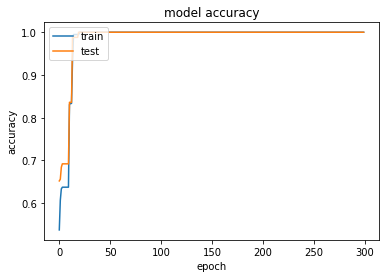

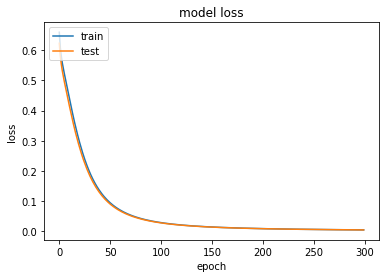

In [9]:
import matplotlib.pyplot as plt
print(hist.history.keys())
# summarize history for accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


## Analyze the results.



In [10]:
print (model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                96        
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________
None


## print the confusion matrix obtained on the test dataset.

Use the **confusion_matrix()** function provided in **sklearn.metrics**.

Confusion matrix, without normalization
[[ 87   0]
 [  0 163]]


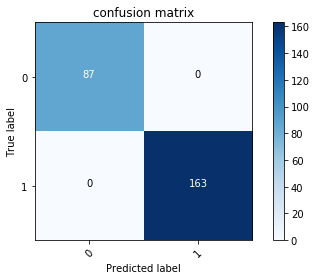

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

class_names = ["0","1"]
y_test_pred = model.predict(X_test).round()
cnf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=class_names,normalize=False,title='confusion matrix')
plt.show()

Normalize the confusion matrix to show graphically the prediction probability map.



In [12]:
print('True Negative counts:',cnf_matrix[0,0])
print('True Positive counts:',cnf_matrix[1,1])

True Negative counts: 87
True Positive counts: 163


Evaluate the model on the test dataset. What is the accuracy on the test dataset? Use the model's class function **evaluate()**.

In [13]:
#evaluating model performance
model.evaluate(X_test,y_test,batch_size=1)

250/250 [==============================] - 0s 556us/step


[0.004902335926890658, 1.0]

## **Conclusions:**

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        87
         1.0       1.00      1.00      1.00       163

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250

Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


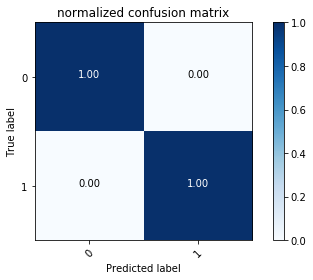

In [14]:
print(classification_report(y_test, y_test_pred))
plot_confusion_matrix(cnf_matrix,classes=class_names,normalize=True,title='normalized confusion matrix')